In [28]:
import numpy as np
import pandas as pd

In [29]:
suicide_data = pd.read_csv('../input/master.csv')

In [30]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [31]:
suicide_data.columns.values

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype=object)

In [32]:
suicide_data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100kpop', 'country-year', 'HDI for year',
       'gdp_for_year_dollars', 'gdp_per_capita_dollars', 'generation']
suicide_data.columns.values

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100kpop', 'country-year', 'HDI for year',
       'gdp_for_year_dollars', 'gdp_per_capita_dollars', 'generation'],
      dtype=object)

In [33]:
#gdp_for_year is numerical feature, but due to comma seperated number it is stored as string
suicide_data['gdp_for_year_dollars'] = suicide_data['gdp_for_year_dollars'].str.replace(',','').astype(np.int64)


In [34]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country                   27820 non-null object
year                      27820 non-null int64
sex                       27820 non-null object
age                       27820 non-null object
suicides_no               27820 non-null int64
population                27820 non-null int64
suicidesper100kpop        27820 non-null float64
country-year              27820 non-null object
HDI for year              8364 non-null float64
gdp_for_year_dollars      27820 non-null int64
gdp_per_capita_dollars    27820 non-null int64
generation                27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


 Total 27820 entries

Numerical features: year, suicides_no, population, suicides/100k pop, HDI for year, gdp_for_year, gdp_per_capita

Categorical features: country, sex, age, generation

In [35]:
suicide_data.isnull().sum()

country                       0
year                          0
sex                           0
age                           0
suicides_no                   0
population                    0
suicidesper100kpop            0
country-year                  0
HDI for year              19456
gdp_for_year_dollars          0
gdp_per_capita_dollars        0
generation                    0
dtype: int64

HDI for year feature has null values so we will drop it and also we don't want country-year

In [36]:
suicide_newdata = suicide_data.drop(['HDI for year', 'country-year'],axis=1)


Distribution of Numerical features

In [37]:
suicide_newdata.describe()

,year,suicides_no,population,suicidesper100kpop,gdp_for_year_dollars,gdp_per_capita_dollars
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


Distribution of categorical features

In [38]:
suicide_newdata.describe(include='object')

,country,sex,age,generation
count,27820,27820,27820,27820
unique,101,2,6,6
top,Mauritius,male,75+ years,Generation X
freq,382,13910,4642,6408


In [39]:
#Visualizing the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

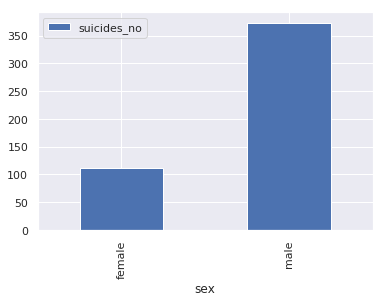

In [40]:
suicide_newdata[['sex','suicides_no']].groupby('sex').mean().plot(kind='bar')

Males are having very high suicide rate

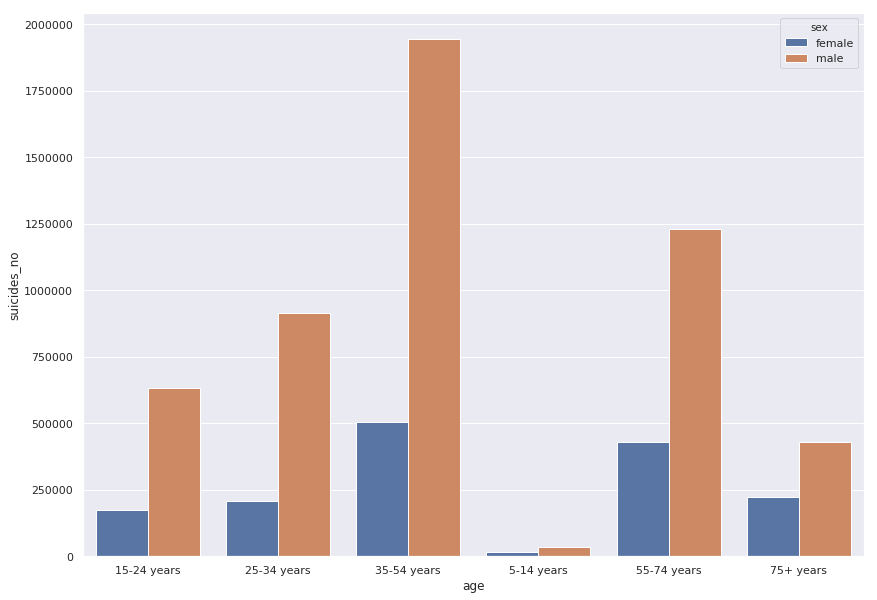

In [41]:
plt.figure(figsize=(14,10))
sns.barplot(x='age',y='suicides_no',data=suicide_newdata.groupby(['age','sex']).sum().reset_index(),hue='sex')

Suicide rate is high in age group 35-54 years



Suicide rate is low in age group 5-14 years

In [42]:
country_suicides = suicide_newdata[['country','suicides_no']].groupby(['country']).sum()

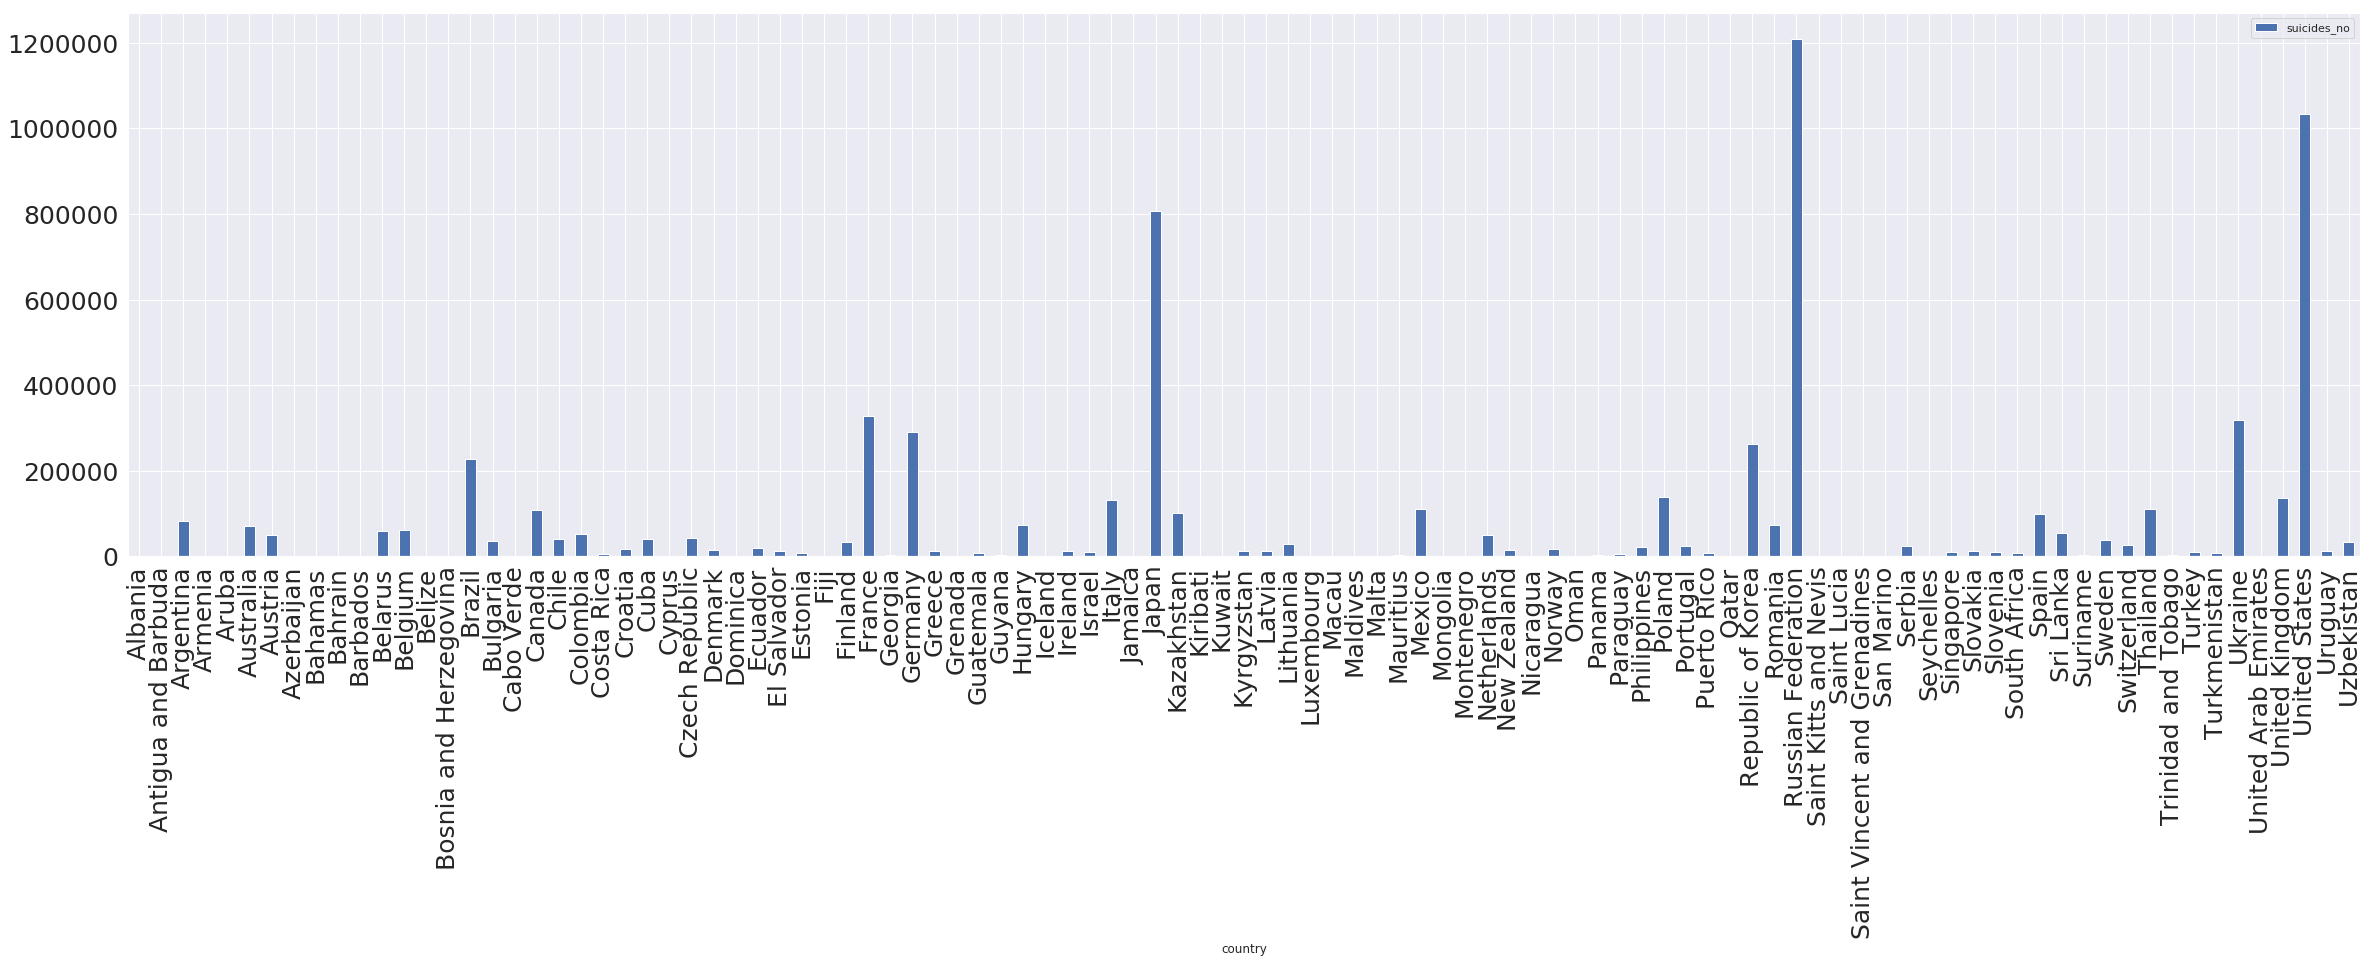

In [43]:
country_suicides.plot(kind='bar', figsize=(40,10), fontsize=25)


In [44]:
country_suicides = country_suicides.reset_index().sort_values(by='suicides_no',ascending =False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

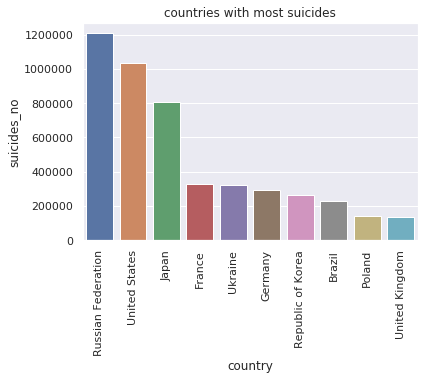

In [45]:
Top_10 = country_suicides[:10]
sns.barplot(x='country', y='suicides_no', data=Top_10).set_title('countries with most suicides')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

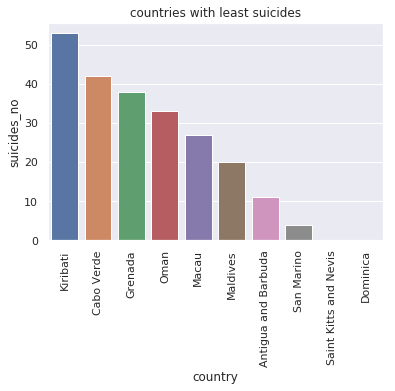

In [46]:
bottom_10 = country_suicides[-10:]
sns.barplot(x='country', y='suicides_no', data=bottom_10).set_title('countries with least suicides')
plt.xticks(rotation=90)


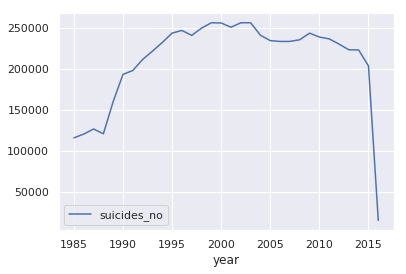

In [47]:
suicide_newdata[['year','suicides_no']].groupby(['year']).sum().plot()

The suicide rate had grown rapidly from year 1990

The rate of suicide has drastically reduced in year 2016

Suicides categorised by generations

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

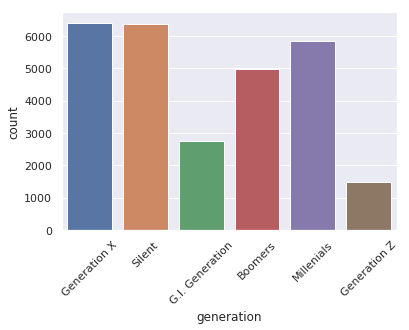

In [48]:
sns.countplot(x='generation',data=suicide_newdata)
plt.xticks(rotation=45)


In [49]:
gen_year = suicide_newdata[['suicides_no','generation','year']].groupby(['generation','year']).sum().reset_index()

Text(0.5, 1.0, 'Suicides vs generations per year')

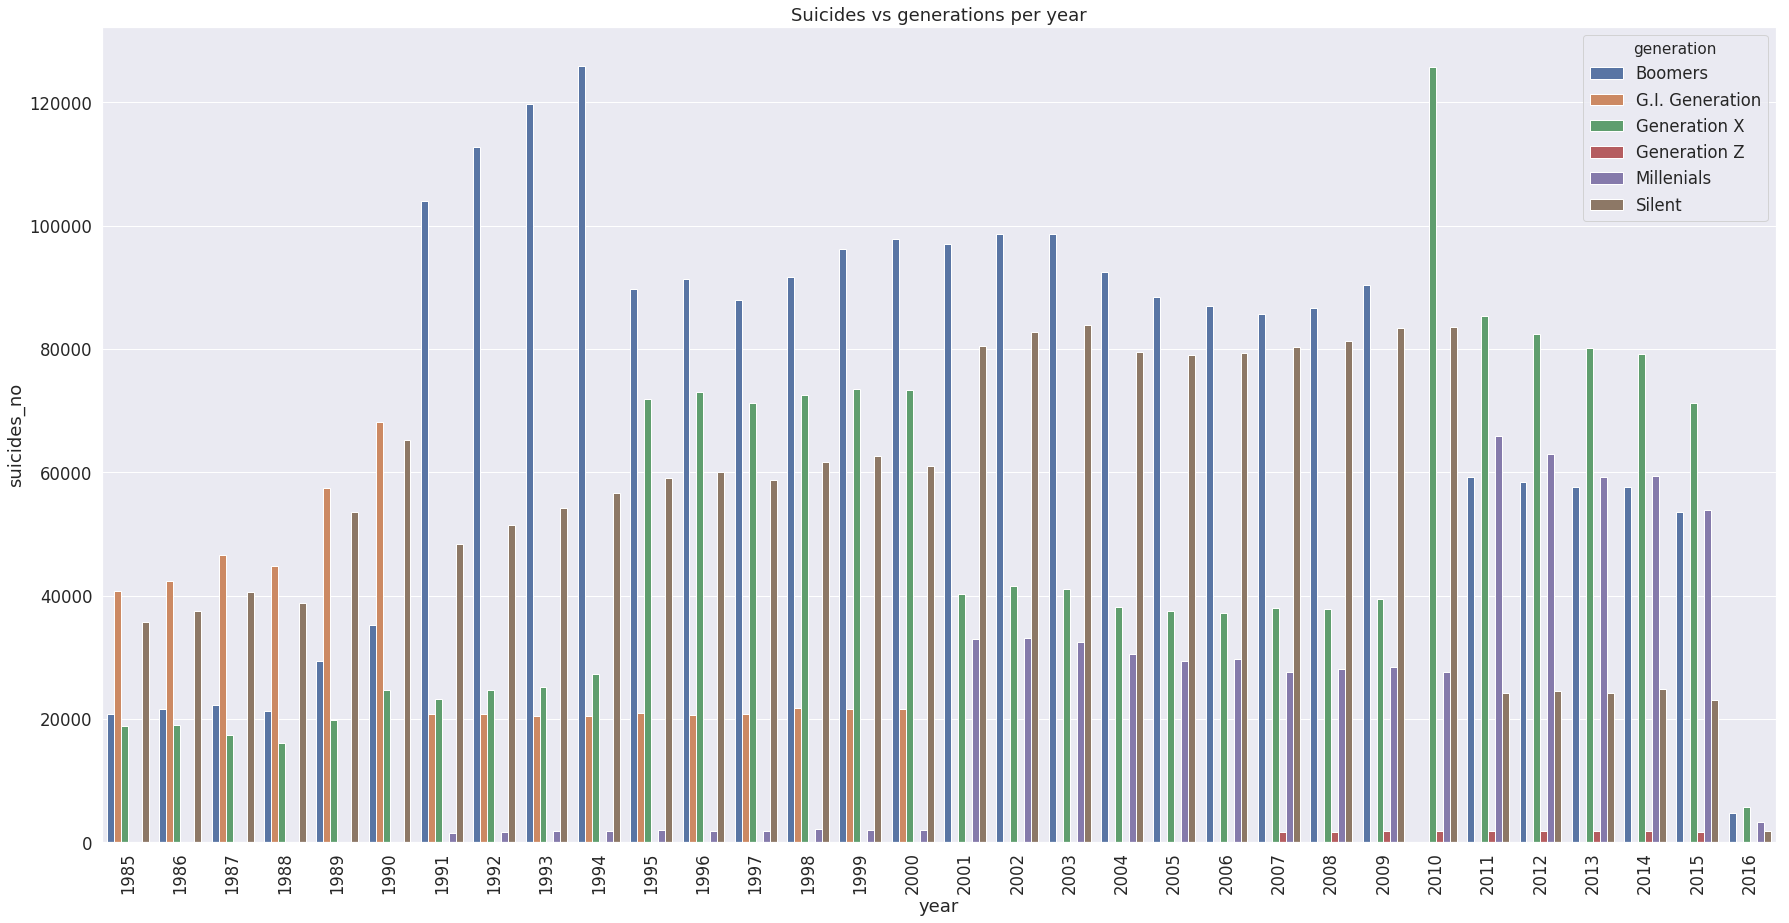

In [50]:
plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year',
            hue='generation', data=gen_year, palette='deep').set_title('Suicides vs generations per year')

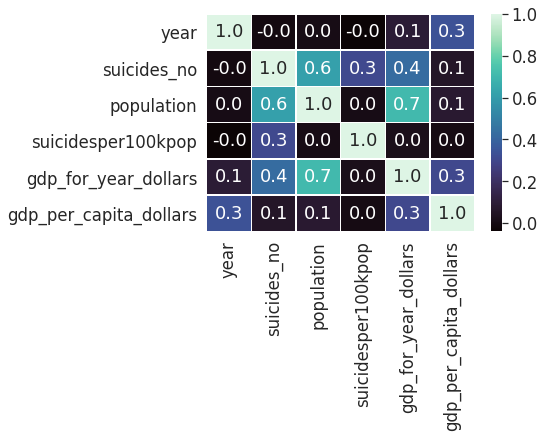

In [51]:
sns.heatmap(data= suicide_newdata.corr(),annot=True, fmt='.1f',cmap='mako',linewidths=.5)

1) Population and gdp_for_year are correlated

2) Population and suicides_no is also correlated

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'country vs population')

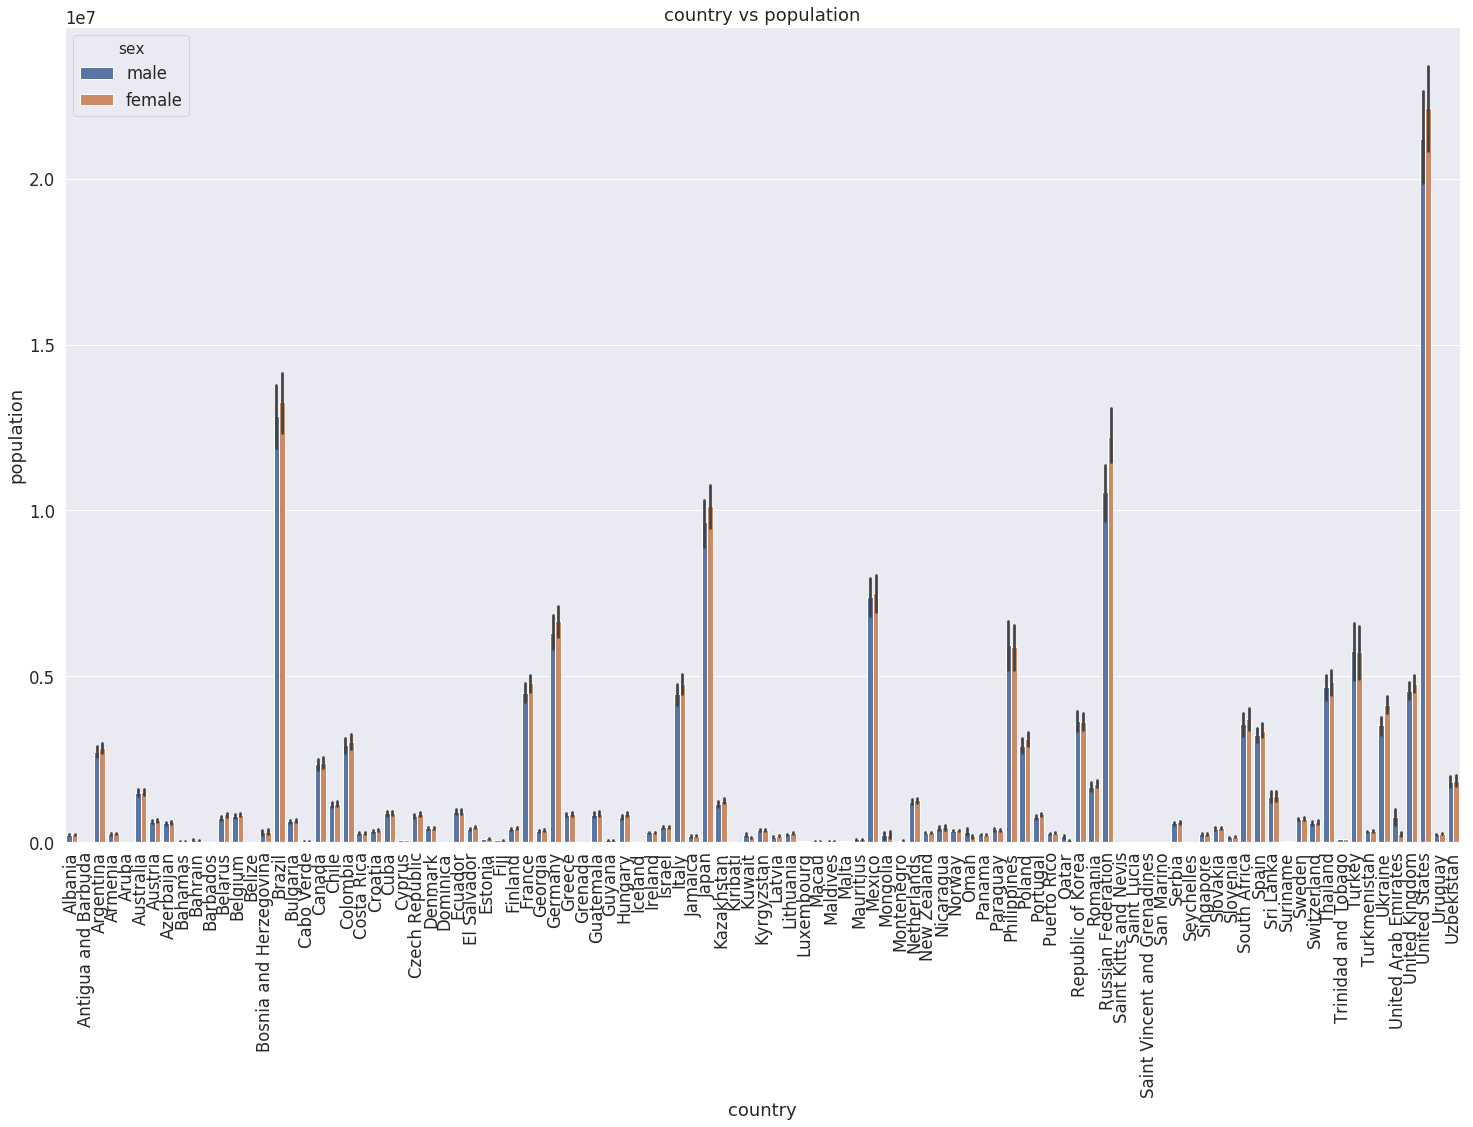

In [52]:
plt.figure(figsize=(25,15))
plt.xticks(rotation=90)
sns.barplot(x='country', y='population', hue='sex', data=suicide_newdata).set_title('country vs population')